In [41]:
import seaborn as sns
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

plt.rc('font', family='AppleGothic')  # Set font to AppleGothic for macOS
df_samsung = fdr.DataReader('KRX:005930')

In [42]:
stock = df_samsung[['Close', 'Volume']].copy()
print(stock.loc['2017-12-20':'2018-01-05'])
print(stock.loc['2018-04-26':'2018-05-05'])


              Close  Volume
Date                       
2017-12-20  2544000  201611
2017-12-21  2457000  312486
2017-12-22  2485000  223993
2017-12-26  2410000  320797
2017-12-27  2468000  214872
2017-12-28  2548000  179709
2018-01-02    51020  169485
2018-01-03    51620  200270
2018-01-04    51080  233909
2018-01-05    52120  189623
            Close    Volume
Date                       
2018-04-26  52140    360931
2018-04-27  53000    606216
2018-04-30  53000         0
2018-05-02  53000         0
2018-05-03  53000         0
2018-05-04  51900  39565391


In [43]:
import pandas as pd

stock_split_price = pd.Timestamp('2018-01-01')
stock_split_volume = pd.Timestamp('2018-05-01')
stock['Close'] = stock.apply(lambda x: x['Close'] / 50 if x.name < stock_split_price else x['Close'], axis=1)
stock['Volume'] = stock.apply(lambda x: x['Volume'] * 50 if x.name < stock_split_volume else x['Volume'], axis=1)
stock = stock[stock['Volume'] != 0]
print(stock.loc['2017-12-20':'2018-01-05'])
print(stock.loc['2018-04-26':'2018-05-05'])

              Close      Volume
Date                           
2017-12-20  50880.0  10080550.0
2017-12-21  49140.0  15624300.0
2017-12-22  49700.0  11199650.0
2017-12-26  48200.0  16039850.0
2017-12-27  49360.0  10743600.0
2017-12-28  50960.0   8985450.0
2018-01-02  51020.0   8474250.0
2018-01-03  51620.0  10013500.0
2018-01-04  51080.0  11695450.0
2018-01-05  52120.0   9481150.0
              Close      Volume
Date                           
2018-04-26  52140.0  18046550.0
2018-04-27  53000.0  30310800.0
2018-05-04  51900.0  39565391.0


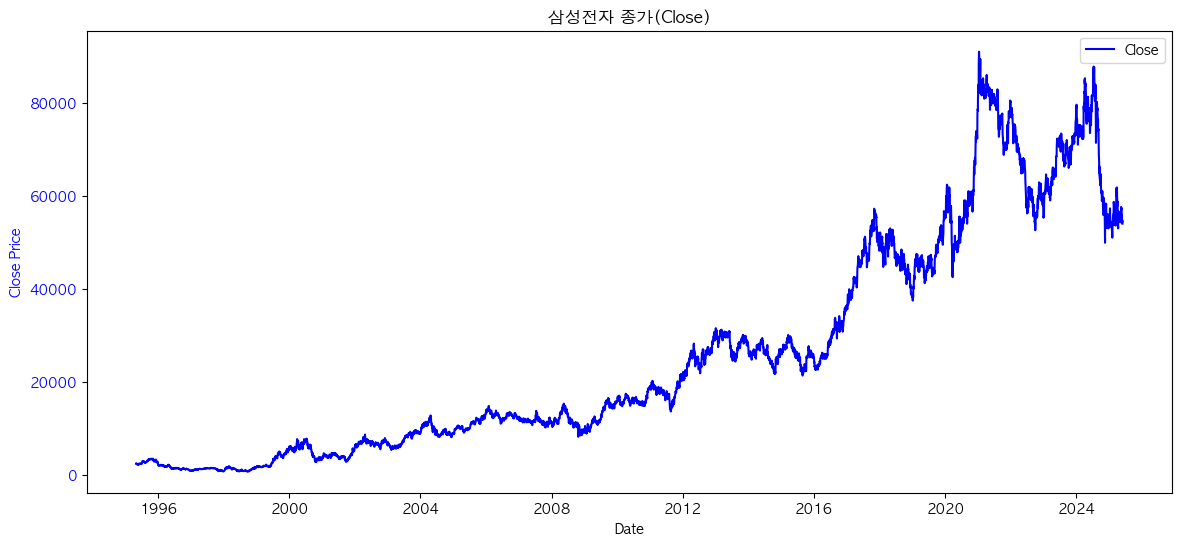

In [45]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Close price with seaborn
sns.lineplot(x=stock.index, y=stock['Close'], ax=ax1, color='blue', label='Close')
ax1.set_ylabel('Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('삼성전자 종가(Close)')

# Plot Volume on secondary y-axis with seaborn
plt.show()


# STL 분해 (Seasonal-Trend decomposition using Loess)
삼성전자 종가(Close)에 대해 statsmodels의 STL을 적용하여 추세, 계절성, 잔차를 분해하고 시각화합니다.

/opt/anaconda3/envs/py313/lib/python3.13/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.tight_layout()
/var/folders/v4/hhmffgns5_n60km7fg4p4cvw0000gn/T/ipykernel_61645/1417179032.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/envs/py313/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


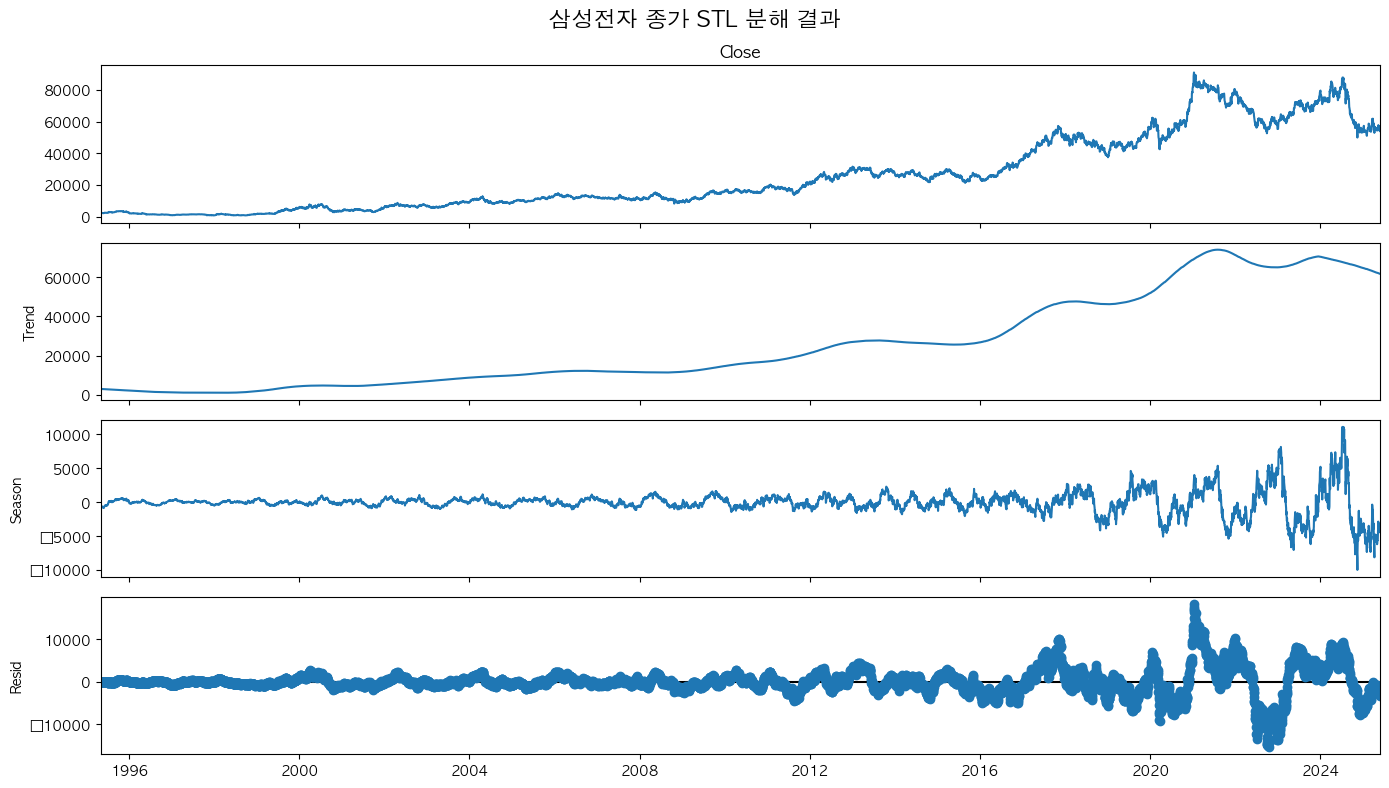

In [48]:
# 결측치 제거 (STL은 결측치가 있으면 동작하지 않음)
close = stock['Close'].dropna()

# STL 분해 (주기=365로 연간 seasonality 가정, 필요시 조정)
stl = STL(close, period=365)
result = stl.fit()

# 분해 결과 시각화
fig = result.plot()
fig.set_size_inches(14, 8)
fig.suptitle('삼성전자 종가 STL 분해 결과', fontsize=16)
plt.tight_layout()
plt.show()